In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
names = ["NODE", "ANODE",
        "SONODE",
        "HBNODE", "GHBNODE", 
        "NesterovNODE", "GNesterovNODE"]
file_names = ["../output/walker2d/walker_NODE_rnn_9929.csv", "../output/walker2d/walker_ANODE_rnn_10019.csv",
              "../output/walker2d/walker_SONODE_rnn_11471.csv",
              "../output/walker2d/walker_HBNODE_rnn_10099.csv", "../output/walker2d/walker_GHBNODE_rnn_10099.csv",
              "../output/walker2d/walker_NesterovNODE_rnn_10098.csv", "../output/walker2d/walker_GNesterovNODE_rnn_10098.csv"]
df_names = {}
for i in range(len(names)):
        temp_df = pd.read_csv(file_names[i])
        attr_names = [col for col in temp_df.columns if 'grad' in col]
        df_names[names[i]] = temp_df[attr_names]

df_names_temp = {}
names = ["NODE", "GHBNODE", "NesterovNODE", "GNesterovNODE"]
for i, name in enumerate(names):
    df_names_temp[name] = df_names[name].drop(columns=['grad_64'])
    df_names_temp[name] = df_names_temp[name].rename(columns=lambda x: int(x[5:]))
    df_names_temp[name] = df_names_temp[name].reindex(sorted(df_names_temp[name].columns), axis=1)
    df_names_temp[name] = df_names_temp[name].iloc[:, ::-1]

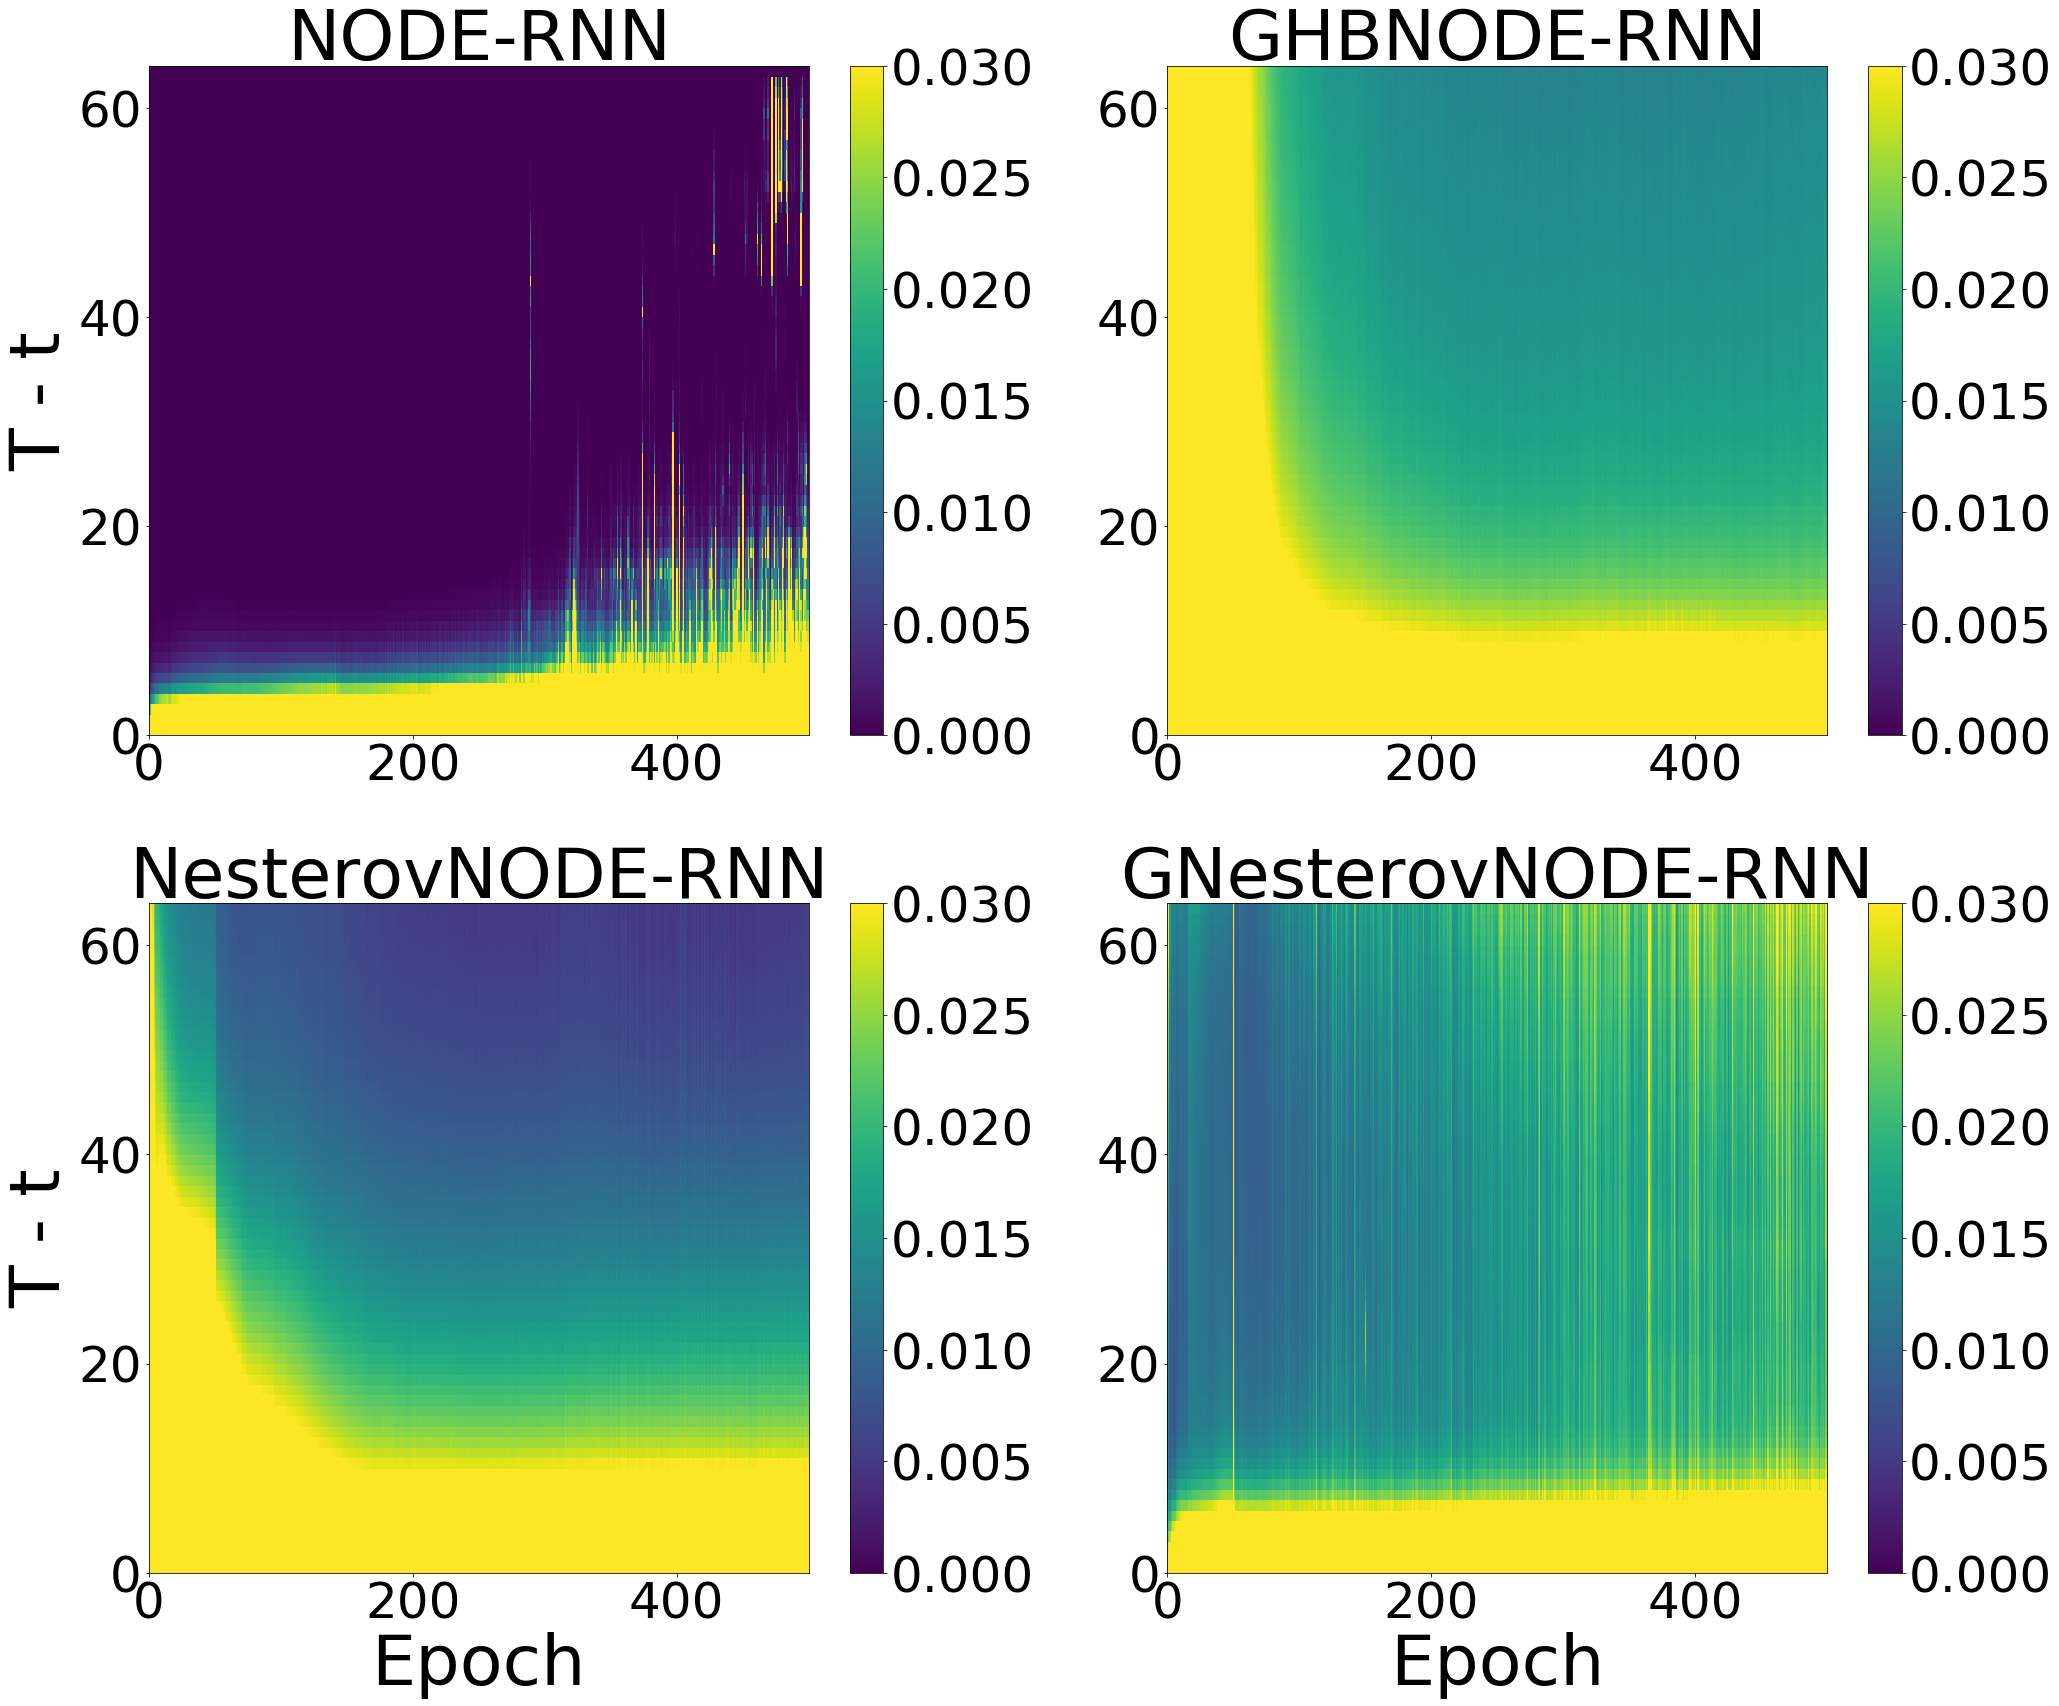

In [6]:
font = {'size'   : 50}
plt.rc('font', **font)

fig = plt.figure(figsize=(30, 25))

ax1 = fig.add_subplot(221)
ax1.set_title("NODE-RNN", fontsize=70)
# ax1.set_xlabel("Epoch", fontsize=70)
ax1.set_ylabel("T - t", fontsize=70)
mesh1 = ax1.pcolormesh(df_names_temp["NODE"].values.T, cmap='viridis', vmin=0, vmax=0.03)

ax2 = fig.add_subplot(222)
ax2.set_title("GHBNODE-RNN", fontsize=70)
# ax2.set_xlabel("Epoch", fontsize=70)
# ax2.set_ylabel("T - t", fontsize=70)
mesh2 = ax2.pcolormesh(df_names_temp["GHBNODE"].values.T, cmap='viridis', vmin=0, vmax=0.03)

ax3 = fig.add_subplot(223)
ax3.set_title("NesterovNODE-RNN", fontsize=70)
ax3.set_xlabel("Epoch", fontsize=70)
ax3.set_ylabel("T - t", fontsize=70)
mesh3 = ax3.pcolormesh(df_names_temp["NesterovNODE"].values.T, cmap='viridis', vmin=0, vmax=0.03)

ax4 = fig.add_subplot(224)
ax4.set_title("GNesterovNODE-RNN", fontsize=70)
ax4.set_xlabel("Epoch", fontsize=70)
# ax4.set_ylabel("T - t", fontsize=70)
mesh4 = ax4.pcolormesh(df_names_temp["GNesterovNODE"].values.T, cmap='viridis', vmin=0, vmax=0.03)

fig.colorbar(mesh1, ax=ax1)
fig.colorbar(mesh2, ax=ax2)
fig.colorbar(mesh3, ax=ax3)
fig.colorbar(mesh4, ax=ax4)
fig.tight_layout()

plt.savefig(f"walker2d_longterm.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()